In [9]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from tqdm import tqdm
import time
style.use('seaborn-white')

In [10]:
#Data Preparation
q2train =  pd.read_excel('q2train.xlsx')
x = np.array(q2train[['Aptitude','Verbal']].copy())
y = np.array(q2train[['Label']].copy()).reshape(-1,1)
ones = np.ones((x.shape[0],1))
x = np.concatenate((ones,x),axis=1)

In [11]:
# Training of the prediction function using logistic regression(sigmoid function) 
# learning rate of 0.001 and 1 lakh iterations.
alpha = 0.001
iterations = 100000
n = len(y)
i = 0
j_theta = np.empty(iterations)
theta = np.zeros((x.shape[1],1))
for i in tqdm(range(iterations)):
    z = np.dot(x,theta)
    h = 1/(1+np.exp(-z))
    gradient = np.dot(x.T, (h - y))
    theta = theta-(1/n)*(alpha*gradient)
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    j_theta[i] = cost

100%|██████████| 100000/100000 [00:09<00:00, 10513.84it/s]


Logistic regression  gives :-
theta0 =  -3.465955503926825
theta1 =  0.05786282629111508
theta2 =  -0.0010141044166155854
Cost = 0.4986613130513427


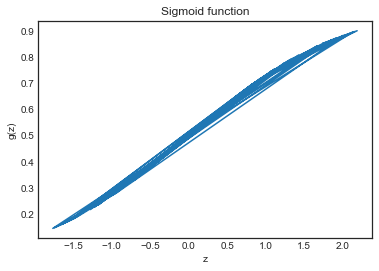

In [12]:
print("Logistic regression  gives :-")
print("theta0 = ", theta.item(0))
print("theta1 = ", theta.item(1))
print("theta2 = ", theta.item(2))
print("Cost =",j_theta[i])
plt.plot(z,h)
plt.title('Sigmoid function')
plt.xlabel('z')
plt.ylabel('g(z)')
plt.savefig("log_reg.png")

In [13]:
# Predicting the results in test file using the trained function 
q2test = pd.read_excel('q2test.xlsx')
X_test = np.array(q2test[['Aptitude','Verbal']].copy())
ones = np.ones((X_test.shape[0],1))
x_test = np.hstack((ones,X_test))
z_test = np.dot(x_test,theta)
h_test = 1/(1+np.exp(-z_test))

In [14]:
# creating output dataframe 
# using "describe()" function to understand the distribution of predicted values using sigmoid function.
output = pd.DataFrame(np.hstack((X_test,h_test)))
output.columns = ['Aptitude', 'Verbal', 'Label']
print(output.describe())

        Aptitude     Verbal      Label
count  30.000000  30.000000  30.000000
mean   69.895452  70.846964   0.600821
std    18.379403  18.192164   0.219723
min    32.822833  35.670703   0.166484
25%    56.021297  59.928088   0.433747
50%    70.507508  74.552429   0.627162
75%    83.273537  86.826465   0.786594
max    99.927858  96.747427   0.904016


In [17]:
# Categorically assigning "1" to values above 0.7 for sigmoid function and exporting the output as a csv file. 
i = 0
for i in range (len(output)):
    if output.at[i,'Label'] > 0.7:
        output.at[i,'Label'] = 1
    else :
        output.at[i,'Label'] = 0
output.to_csv('Output.csv')
print(output)

     Aptitude     Verbal  Label
0   32.822833  43.407173    0.0
1   64.139320  78.131688    0.0
2   72.446494  96.327593    0.0
3   60.557886  73.194998    0.0
4   58.940956  75.958448    0.0
5   99.927858  72.469252    1.0
6   47.364269  88.575865    0.0
7   50.558160  75.909860    0.0
8   60.555556  42.608409    0.0
9   82.326662  42.819879    1.0
10  89.013896  69.903789    1.0
11  94.934507  45.794307    1.0
12  67.419257  66.689353    0.0
13  57.338706  59.614282    0.0
14  80.466756  91.060148    1.0
15  68.568522  85.694307    0.0
16  42.175455  78.944786    0.0
17  75.577702  90.524539    0.0
18  78.735424  96.747427    1.0
19  52.448004  60.869505    0.0
20  94.194331  77.259105    1.0
21  90.548551  87.608792    1.0
22  55.582161  35.670703    0.0
23  74.592692  84.945137    0.0
24  89.945807  45.458284    1.0
25  83.589163  48.480286    1.0
26  42.361701  87.203851    0.0
27  99.415009  68.875409    1.0
28  55.440018  65.031938    0.0
29  74.875893  89.629813    0.0
